## Data Analysis for book recommender system


### load all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.charts import Bar, Histogram, Scatter, BoxPlot, output_file, show
from bokeh.charts.attributes import ColorAttr, CatAttr
import bokeh.plotting
from flask import Flask, render_template, request, redirect, url_for
# ## Load relavent datasets

app = Flask(__name__)

@app.route('/')
def main():
    return redirect('/index')

def analysisCode():
    df1 = pd.read_pickle('goodreadsUserRatings1')
    df2 = pd.read_pickle('goodreadsUserRatings2')
    df3 = pd.read_pickle('goodreadsUserRatings3')
    df4 = pd.read_pickle('goodreadsUserRatings4')
    df5 = pd.read_pickle('goodreadsUserRatings5')
    df6 = pd.read_pickle('goodreadsUserRatings6')
    df7 = pd.read_pickle('goodreadsUserRatings7')
    df = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True)

    #3 Remove duplicates
    df.drop_duplicates().head()
    # Oh remove the Harry potter book 1 which is obviously the most common book

    ## Remove all the ratings given no stars
    df = df[df.Rating != '0']
    df = df[~df['Title'].str.contains("Harry Potter and the Sorcerer's Stone")]
    df['Title'] = df['Title'].apply(lambda x:x.encode('utf-8'))
    df['Rating'] = df.Rating.astype(float)


    # We have now collected reader info from atleast 750 users.. 
    # Let us see how the land lays in non-harry potter books.
    # 
    # ### Forget Harry Potter, 
    nonHarryPotterDf = df[~df['Title'].str.contains("Harry Potter")]
    tempDf2 = pd.DataFrame({'count': nonHarryPotterDf.groupby(['Title']).size()}).reset_index()
    tempDf2 = tempDf2.sort_values('count', ascending=False)
    make_plot1(tempDf2)

    # 1. Select a user that has has read average number of books to recommend a book for 
    df = df[~df['Title'].str.contains("Harry Potter")]
    tempDf = pd.DataFrame({'count': df.groupby(['userName']).size()}).reset_index()
    # Sort 'em
    tempDf = tempDf.sort_values('count', ascending=False)
    luckyUser = tempDf[(tempDf['count'] >= (np.mean(tempDf['count'])-10)) &                   (tempDf['count'] <= (np.mean(tempDf['count'])+10))].userName.iloc[1]

    userHistoryDf = df[df.userName == luckyUser][['Rating', 'Title']]
    print userHistoryDf.head()


    # ### Find people who have books in common with the luckyUser 
    userReadBooks = set(userHistoryDf.Title)
    tempDf['numCommonBooks'] = tempDf['userName'].apply(lambda x:len(list(set(df[df['userName']==x].Title)&userReadBooks)))
    tempDf = tempDf.sort_values('numCommonBooks', ascending=False)
    tempDf = tempDf[tempDf.numCommonBooks >=8]

    ## remove  lucky user from this dataframe
    tempDf = tempDf[~(tempDf.userName == luckyUser)] 


    # ### Let us see what books these people have in common with our luckyUser
    selectedUserDf = df[df.userName.isin(set(tempDf.userName))] 
    selectedUserDf=pd.merge(selectedUserDf[['userName','Title', 'Rating']], userHistoryDf[['Title', 'Rating']], on='Title', how='right')

    ## Create unique book IDs
    bookList =list(set(selectedUserDf.Title))
    bookIDs = dict(zip(bookList, range(0,len(bookList))))
    userList =list(set(selectedUserDf.userName))
    userIDs = dict(zip(userList, range(0,len(userList))))


    selectedUserDf['myBookId'] = selectedUserDf["Title"]
    selectedUserDf['myBookId'] = selectedUserDf['myBookId'].map(bookIDs)
    selectedUserDf['userID'] = selectedUserDf['userName'].map(userIDs)

    ## Hexagonal plot
    plt.figure()
    plt.rcParams['figure.figsize'] = (10.0, 7.0)
    fig = selectedUserDf.plot(kind='hexbin', x='myBookId', y='userID', gridsize=40,  sharex=False, cmap = 'YlGnBu', fontsize=14)
    #fig = selectedUserDf.plot(kind='scatter', x='myBookId', y='Rating_x', c = 'userID')#, gridsize=100,  sharex=False, fontsize=14)

    plt.xlabel('Book Title ID', fontsize=14)
    plt.ylabel('User IDs', fontsize=14)
    plt.title('2-D Histogram representing the number of times a book has been rated by different users')
    plt.setp(fig, 'visible', True)
    plt.savefig('foo.png')

@app.route('/index', methods = ['GET', 'POST'])
def index():
    if request.method == 'GET':
        return render_template('plots.html')

def make_plot1(tempDf2):
    p2 = Bar(tempDf2.head(30), values ='count',         ylabel = 'Number of Readers', xlabel = 'Book Title',         title = 'Books with most readers (removed Harry Potter as it was used to generate this list)',
        label=CatAttr(columns=['Title'], sort=False))
    p2.plot_height=800
    p2.plot_width=1000
    output_file("templates/plots.html")
    show(p2)

@app.route('/plot2',methods=['GET', 'POST'])
def make_plot2():
    if request.method == 'POST':
        return redirect(url_for('index'))
    return render_template('plot2.html')
    
    

if __name__=="__main__":
  app.run(debug = True)

## do the ratings correlate
#plt.figure()
#plt.rcParams['figure.figsize'] = (10.0, 7.0)
#fig = selectedUserDf.plot(kind='hexbin', x='Rating_x', y='Rating_y', gridsize=6,  sharex=False, cmap = 'YlGnBu', fontsize=14)
#fig = selectedUserDf.plot(kind='scatter', x='myBookId', y='Rating_x', c = 'userID')#, gridsize=100,  sharex=False, fontsize=14)

##plt.xlabel('Book Ratings by the user we are creating a recommendation for', fontsize=14)
##plt.ylabel('Book Rating by similar users', fontsize=14)
##plt.title('2-D Histogram representing the number of time the user agrees with people with similar reading patterns')
##plt.setp(fig, 'visible', True)




BokehJS successfully loaded.

## Load relavent datasets

In [2]:
df1 = pd.read_pickle('/Volumes/LittleOne/DataScience/bookRecommender/goodreadsUserRatings1')
df2 = pd.read_pickle('/Volumes/LittleOne/DataScience/bookRecommender/goodreadsUserRatings2')
df3 = pd.read_pickle('/Volumes/LittleOne/DataScience/bookRecommender/goodreadsUserRatings3')
df4 = pd.read_pickle('/Volumes/LittleOne/DataScience/bookRecommender/goodreadsUserRatings4')
df5 = pd.read_pickle('/Volumes/LittleOne/DataScience/bookRecommender/goodreadsUserRatings5')
df6 = pd.read_pickle('/Volumes/LittleOne/DataScience/bookRecommender/goodreadsUserRatings6')
df7 = pd.read_pickle('/Volumes/LittleOne/DataScience/bookRecommender/goodreadsUserRatings7')
df = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True)


#3 Remove duplicates
df.drop_duplicates().head()
# Oh remove the Harry potter book 1 which is obviously the most common book

## Remove all the ratings given no stars
df = df[df.Rating != '0']
df = df[~df['Title'].str.contains("Harry Potter and the Sorcerer's Stone")]
df['Title'] = df['Title'].apply(lambda x:x.encode('utf-8'))
df['Rating'] = df.Rating.astype(float)

### The most highly rated books are




In [3]:
## highly rated books are?
highlyRatedDf = df[(df.Rating >= 4)]

tempDf = pd.DataFrame({'count': highlyRatedDf.groupby(['Title']).size()}).reset_index()
tempDf = tempDf.sort_values('count', ascending=False)
p = Bar(tempDf.head(30), values ='count', \
        ylabel = 'Number of Readers', xlabel = 'Book Title', \
        title = 'People who liked Harry Potter book #1 also liked ...',
        label=CatAttr(columns=['Title'], sort=False))
show(p)


## compute similarity between books

Top 5 most common books that came up are:

In [5]:
tempDf[:20]

,Title,count
9543,Harry Potter and the Prisoner of Azkaban (Harr...,188
9526,Harry Potter and the Chamber of Secrets (Harry...,183
23183,"The Hunger Games (The Hunger Games, #1)",178
9532,Harry Potter and the Goblet of Fire (Harry Pot...,170
9530,Harry Potter and the Deathly Hallows (Harry Po...,162
9534,Harry Potter and the Half-Blood Prince (Harry ...,161
9536,Harry Potter and the Order of the Phoenix (Har...,153
3960,"Catching Fire (The Hunger Games, #2)",137
22464,The Fault in Our Stars,128
6133,"Divergent (Divergent, #1)",118


Obviously the next natural choice for people who liked harry potter would be the second book in the series.

Let us compare and see the commonality of readership between top 10 recommendations

In [6]:
df1 = df#[~df['Title'].str.contains("Harry Potter")]
for i in range(0,10):
    if i == 0:
        commonReaders = set(df1[(df1.Title == tempDf.iloc[i].Title)].userName)
    else:
        tempSet = set(df1[(df1.Title == tempDf.iloc[i].Title)].userName)
        commonReaders = commonReaders & tempSet

miniDf = df1[df1.userName.isin(commonReaders)]        
miniDf = miniDf[miniDf.Title.isin(set(tempDf[:10].Title))]    
miniDf['Rating'] = miniDf.Rating.astype(float)

p1 = BoxPlot(miniDf[['Title', 'Rating']], values='Rating', label=CatAttr(columns=['Title'], sort=False),
            title="Variation of user ratings for top 10 books among 62 common readers who rated Harry Potter #1 high")

#output_file("boxplot.html")

show(p1)
    

Great, less variation among people who read Harry potter series!
We have now collected reader info from atleast 750 users.. 
Let us see how the land lays in non-harry potter books.

### Forget Harry Potter, 

In [12]:
nonHarryPotterDf = df[~df['Title'].str.contains("Harry Potter")]
tempDf2 = pd.DataFrame({'count': nonHarryPotterDf.groupby(['Title']).size()}).reset_index()
tempDf2 = tempDf2.sort_values('count', ascending=False)
p2 = Bar(tempDf2.head(30), values ='count', \
        ylabel = 'Number of Readers', xlabel = 'Book Title', \
        title = 'Books with most readers (removed Harry Potter as it was used to generate this list)',
        label=CatAttr(columns=['Title'], sort=False))
p2.plot_height=800
p2.plot_width=1000
output_file("templates/plots.html")
show(p2)


#book1Df = df[(df.Title == tempDf.iloc[0].Title)][['Title', 'userName', 'Rating']]
#book2Df = df[(df.Title == tempDf.iloc[1].Title)][['Title', 'userName', 'Rating']]
#commonReaders = set(book1Df.userName) & set(book2Df.userName)
#book1Df = book1Df[book1Df.userName.isin(list(commonReaders))]
#book2Df = book2Df[book2Df.userName.isin(list(commonReaders))]
#newbookDf = bookDf.pivot(index = ['Rating'], columns = ['Title'] )
#bookDf.head()
#scatter = Scatter(df, x='mpg', y='hp', color='cyl', marker='origin',
#                  title="mpg", xlabel="Miles Per Gallon", ylabel="Horsepower")

## variation in user ratings for these books

In [50]:
#varDf = nonHarryPotterDf[~nonHarryPotterDf.Title.isin(set(tempDf2.head(10)['Title']))]
#p2 = BoxPlot(varDf[['Title', 'Rating']], values='Rating', label=CatAttr(columns=['Title'], sort=False),
#            title="Variation of user ratings for top 10 books among 62 common readers who rated Harry Potter #1 high")
#p2.show()

Group data into three categories:

1. 'Liked it' = star rating of 4 and 5
2. 'meh' = star rating of 3
3. 'hated it' = star rating of 2, 1

### Let see if collab filtering concept would work

#### To do:

1. Select the user that has a  median number of books to recommend a book for 

In [269]:
df = df[~df['Title'].str.contains("Harry Potter")]
tempDf = pd.DataFrame({'count': df.groupby(['userName']).size()}).reset_index()
# Sort 'em
tempDf = tempDf.sort_values('count', ascending=False)
luckyUser = tempDf[(tempDf['count'] >= (np.mean(tempDf['count'])-10)) &\
                   (tempDf['count'] <= (np.mean(tempDf['count'])+10))].userName.iloc[1]

userHistoryDf = df[df.userName == luckyUser][['Rating', 'Title']]
print userHistoryDf.head()

       Rating                                    Title
84247       5  Beautiful Player (Beautiful Bastard #3)
84248       5                Maybe Someday (Maybe, #1)
84249       5   Liam's Story (The Darkest Minds, #1.6)
84250       5                           One True Loves
84251       5                                Ugly Love


### Find people who have atleast 8 books in common with the luckyUser (to account for Harry Potter series bias)

In [270]:
userReadBooks = set(userHistoryDf.Title)
tempDf['numCommonBooks'] = tempDf['userName'].apply(lambda x:len(list(set(df[df['userName']==x].Title)&userReadBooks)))
tempDf = tempDf.sort_values('numCommonBooks', ascending=False)
tempDf = tempDf[tempDf.numCommonBooks >=8]

## remove  ivanesca from this dataframe
tempDf = tempDf[~(tempDf.userName == luckyUser)] 

### Let us see what books these top 10 people have in common with our luckyUser

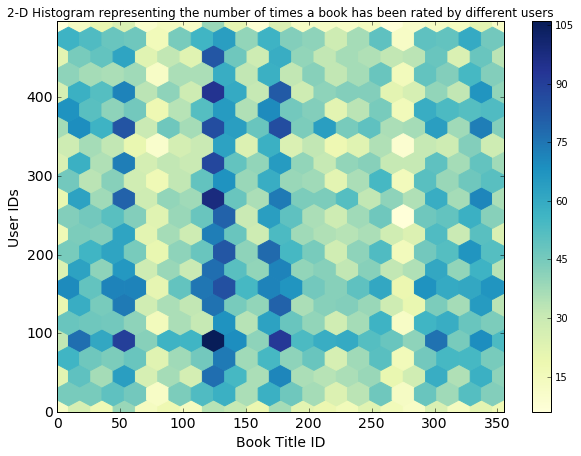

In [280]:
selectedUserDf = df[df.userName.isin(set(tempDf.userName))] 
selectedUserDf=pd.merge(selectedUserDf[['userName','Title', 'Rating']], userHistoryDf[['Title', 'Rating']], on='Title', how='right')

## Create unique book IDs
bookList =list(set(selectedUserDf.Title))
bookIDs = dict(zip(bookList, range(0,len(bookList))))
userList =list(set(selectedUserDf.userName))
userIDs = dict(zip(userList, range(0,len(userList))))


selectedUserDf['myBookId'] = selectedUserDf["Title"]
selectedUserDf['myBookId'] = selectedUserDf['myBookId'].map(bookIDs)
selectedUserDf['userID'] = selectedUserDf['userName'].map(userIDs)

## Hexagonal plot
plt.figure()
plt.rcParams['figure.figsize'] = (10.0, 7.0)
fig = selectedUserDf.plot(kind='hexbin', x='myBookId', y='userID', gridsize=20,  sharex=False, cmap = 'YlGnBu', fontsize=14)
#fig = selectedUserDf.plot(kind='scatter', x='myBookId', y='Rating_x', c = 'userID')#, gridsize=100,  sharex=False, fontsize=14)

plt.xlabel('Book Title ID', fontsize=14)
plt.ylabel('User IDs', fontsize=14)
plt.title('2-D Histogram representing the number of times a book has been rated by different users')
plt.setp(fig, 'visible', True)

#p1 = BoxPlot(selectedUserDf[['Title', 'Rating_x']].head(50), values='Rating_x', label=CatAttr(columns=['Title'], sort=False),
#            title="Variation of user ratings for top 10 books among 62 common readers who rated Harry Potter #1 high")

#output_file("boxplot.html")

#show(p1)

plt.savefig('foo.png')

[None]

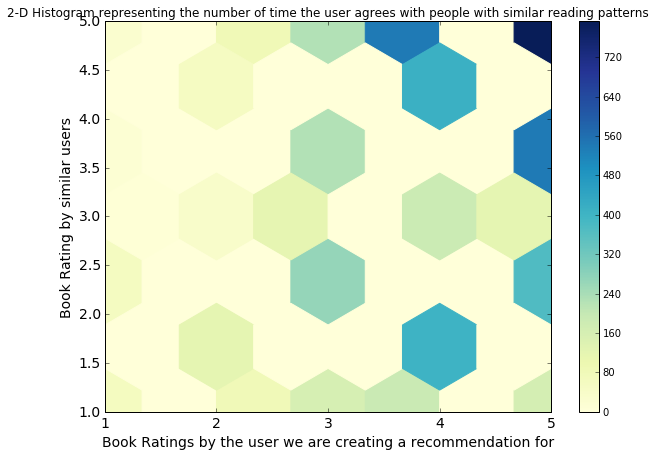

In [260]:
## 
plt.figure()
plt.rcParams['figure.figsize'] = (10.0, 7.0)
fig = selectedUserDf.plot(kind='hexbin', x='Rating_x', y='Rating_y', gridsize=6,  sharex=False, cmap = 'YlGnBu', fontsize=14)
#fig = selectedUserDf.plot(kind='scatter', x='myBookId', y='Rating_x', c = 'userID')#, gridsize=100,  sharex=False, fontsize=14)

plt.xlabel('Book Ratings by the user we are creating a recommendation for', fontsize=14)
plt.ylabel('Book Rating by similar users', fontsize=14)
plt.title('2-D Histogram representing the number of time the user agrees with people with similar reading patterns')
plt.setp(fig, 'visible', True)


In [274]:

len(df)

241746

In [275]:
len(set(df.userName))

684

In [277]:
len(set(df.Title))

102056